<a href="https://colab.research.google.com/github/pedxs/PredictBond-with-FS.ipynb/blob/main/PredictBond_with_FS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install sidetable
# !pip install googlemaps
# !pip install gmaps
# !pip install geog

In [ ]:
import pandas as pd
import pickle
import os.path
import time
import numpy as np
import string
import re
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')
#gc = gspread.authorize(GoogleCredentials.get_application_default())
import io
from googleapiclient.http import MediaIoBaseDownload

import sidetable
import googlemaps
from datetime import datetime
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
import json
import geog
import shapely.geometry
import gmaps
import gmaps.datasets
from datetime import date

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# Financials

In [ ]:
# !pip install investpy
import investpy

stock_list = investpy.get_stocks_list(country="Thailand")[0:30]
# type_list = ["income_statement", "balance_sheet", "cash_flow_statement"]
stock_list


['MONTRIu',
 'AJ',
 'AH',
 'AIT',
 'ADVANC',
 'AEC',
 'AEONTS',
 'APURE',
 'AHC',
 'AOT',
 'ALUCON',
 'AMANAH',
 'AMARIN',
 'AMATA',
 'ABPIFu',
 'ANAN',
 'AP',
 'AQ',
 'AQUA',
 'A',
 'AAV',
 'DRTf',
 'ASIA',
 'AMC',
 'ASP',
 'APCS',
 'ASK',
 'AI',
 'ASIMAR',
 'ASIAN']

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open_by_key('19ARPhzBZT4DuhncrRaRdMrMnu9k7xxFHMC2I8X66_YI').worksheet("Data 2020-2021")

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df=pd.DataFrame.from_records(rows[1:],columns=rows[0])

stock_list = list(set(df["Name"].values)) 
stock_list

[['Name', 'Grade', 'THA', 'Type', 'Issue Size', 'Total Outstanding Value', 'Percent', 'Coupon Type', 'Coupon Rate (%)', 'Term', 'Issued Date', 'SameMonth', 'Maturity Date', 'PaymentDate', 'Lead U/W', 'total_asset', 'total_lia', 'total_eq', 'Total_revenue', 'Total_grossprofit', 'operating_cash', 'investing_cash', 'financing_cash'], ['MBK', 'A-', 'Null', 'Null', '3000000000', '3000000000', '100', 'FIXED', '2.94', '9.01', '06/01/2020', '1', '06/01/2029', '6/1,6/7', '0', '#N/A', '34199.31', '21058.11', '8195.61', '-744.11', '2430.50', '319.20', '-2142.55'], ['TFG', 'BBB-', 'Null', 'Null', '2000000000', '2000000000', '100', 'FIXED', '2.48', '5.01', '08/01/2020', '1', '08/01/2025', '8/1,8/4,8/7,8/10', 'UOBT', '35567.05', '23996.58', '11570.46', '35074.25', '551.94', '-1895.99', '-4947.37', '6397.70'], ['CWTTH', 'Null', 'Null', 'Null', '379200000', '379200000', '100', 'FIXED', '6.75', '2', '15/01/2020', '1', '15/01/2022', '15/1', 'GBS', '#N/A', '#N/A', '#N/A', '#N/A', '#N/A', '#N/A', '#N/A', 

['PF',
 'JMT',
 'MDE',
 'ECF',
 'QH',
 'TPCH',
 'CGD',
 'CPFTH',
 'PTTC',
 'CMC',
 'SCC',
 'IVL',
 'BAM',
 'TNITY',
 'LIT',
 'TMI',
 'HMPRO',
 'JCK',
 'MBKET',
 'ORI',
 'DUSIT',
 'SUPER',
 'ROJNA',
 'BANPU31',
 'PTTEPT',
 'AYCAL',
 'ADVANC',
 'JWD',
 'NCAP',
 'BJC',
 'LHBANK',
 'THANI',
 'GRAND',
 'PRIME',
 'SAWAD',
 'HMC',
 'TWZ',
 'BCP',
 'GULF',
 'GUNKUL',
 'FTREIT',
 'BTSC',
 'CWT',
 'TPOLY',
 'IRPC',
 'EPG',
 'SINGER',
 'BAG',
 'SPI',
 'BAFS',
 'SGP',
 'MTC',
 'WHA',
 'CWTTH',
 'NER',
 'TIDLOR',
 'SNW',
 'GCAP',
 'NUSA',
 'EB',
 'NCH',
 'TFG',
 'TOLC',
 'KCAR',
 'GHM',
 'TU',
 'CPALL',
 'ASP',
 'KCC',
 'WAM',
 'NRF',
 'LPN',
 'KTC',
 'TSE',
 'CLT',
 'STARK',
 'TBEV',
 'MK',
 'CGH',
 'IRIS',
 'GLOCON',
 'HLTC',
 'ITD',
 'CISSA',
 'UOBT',
 'PSTC',
 'NOBLE',
 'PPS',
 'DA',
 'A',
 'KFS',
 'BANPU3',
 'MQDC',
 'GOLD',
 'TLT',
 'KUN',
 'SENA',
 'TBB',
 'INET',
 'CPNREIT',
 'CHAYO',
 'RLTH',
 'MBK',
 'BGRIM',
 'CGS',
 'CPF',
 'GULF3',
 'TPIPL',
 'ROOJAI',
 'PTTEP',
 'SC',
 'ICBCTL',
 'PTG

In [ ]:
investpy.get_stock_financial_summary(stock="MBKET", country='Thailand',summary_type='balance_sheet', period='quarterly')

In [ ]:
import pandas as pd
used_stock = []
fail = []
check_type = []

for i in stock_list:

  try:
    data = investpy.get_stock_financial_summary(stock=i, country='Thailand',summary_type='cash_flow_statement', period='quarterly')
    data = data.reset_index()
    data["Symbol"] = i
    
    if len(used_stock) == 0 :
        combine1 = pd.DataFrame(columns = data.columns)
      
    combine1 = pd.concat([combine1,data],ignore_index=True)

    used_stock.append(i)

  except:
    print("unsuccess")


unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess


In [ ]:
import pandas as pd
used_stock = []
fail = []
check_type = []

for i in stock_list:

  try:
    data = investpy.get_stock_financial_summary(stock=i, country='Thailand',summary_type='balance_sheet', period='quarterly')
    data = data.reset_index()
    data["Symbol"] = i
    
    if len(used_stock) == 0 :
        combine2 = pd.DataFrame(columns = data.columns)
      
    combine2 = pd.concat([combine2,data],ignore_index=True)

    used_stock.append(i)

  except:
    print("unsuccess")

unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess


In [ ]:
import pandas as pd
used_stock = []
fail = []
check_type = []

for i in stock_list:

  try:
    data = investpy.get_stock_financial_summary(stock=i, country='Thailand',summary_type='income_statement', period='quarterly')
    data = data.reset_index()
    data["Symbol"] = i
    
    if len(used_stock) == 0 :
        combine3 = pd.DataFrame(columns = data.columns)
      
    combine3 = pd.concat([combine3,data],ignore_index=True)

    used_stock.append(i)

  except:
    print("unsuccess")

unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess
unsuccess


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
# create, and save df
from gspread_dataframe import set_with_dataframe


sheet = gc.open_by_key('19ARPhzBZT4DuhncrRaRdMrMnu9k7xxFHMC2I8X66_YI').worksheet("cash_flow_statement")
set_with_dataframe(sheet, combine1) 
sheet = gc.open_by_key('19ARPhzBZT4DuhncrRaRdMrMnu9k7xxFHMC2I8X66_YI').worksheet("balance_sheet")
set_with_dataframe(sheet, combine2) 
sheet = gc.open_by_key('19ARPhzBZT4DuhncrRaRdMrMnu9k7xxFHMC2I8X66_YI').worksheet("income_statement")
set_with_dataframe(sheet, combine3) 


# Clean Training Set

In [ ]:
sh11 = gc.open_by_url('https://docs.google.com/spreadsheets/d/19ARPhzBZT4DuhncrRaRdMrMnu9k7xxFHMC2I8X66_YI/edit#gid=218558959')
worksheet = sh11.get_worksheet(1) ####
rows11 = worksheet.get_all_values()
df = pd.DataFrame(rows11)

new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df = df[df["total_asset"]!= "#N/A"]
df = df.reset_index().drop(columns = ["index"])

all_cols = list(df.columns)
str_cols = ["Name","Grade","THA","Type","Coupon Type"]
num_cols = []
for item in all_cols:
  if item not in str_cols:
    num_cols.append(item)

df = df[str_cols + num_cols]
df["BASEDATE"] = "2000-01-01"

def clean_date(x):
  lis = x.split("/")
  date = lis[2] +"-"+ lis[1] +"-"+ lis[0]
  return date

def to_str(x):
  x = str(x)
  return x.replace(" days 00:00:00","")

df["Issued Date"] = pd.to_datetime(df["Issued Date"].apply(lambda x : (clean_date(x)))) - pd.to_datetime(df["BASEDATE"])
df["Maturity Date"] = pd.to_datetime(df["Maturity Date"].apply(lambda x : (clean_date(x)))) - pd.to_datetime(df["BASEDATE"])

df["Issued Date"] = df["Issued Date"].apply(lambda x : to_str(x))
df["Maturity Date"] =df["Maturity Date"].apply(lambda x : to_str(x))

def comma(x):
  if x == "Null":
    x = 0
  else:
    x = x+","
  return x

df["PaymentDate"] = df["PaymentDate"].apply(lambda x : comma(x))
df["PaymentDate"] = df["PaymentDate"].str.count(",")

df["Lead U/W"] = df["Lead U/W"].apply(lambda x : comma(x))
df["Lead U/W"] = df["Lead U/W"].str.count(",")

for col in num_cols:
  df[col] = pd.to_numeric(df[col])
df.drop(columns=["Name"],inplace=True)
str_cols.remove("Name")
df=pd.concat([pd.get_dummies(df[str_cols]) , df[num_cols]],axis=1)


model_cols = list(df.columns)

clean_data = df


# Train Model (Training set 80%)

In [ ]:
y = df["Coupon Rate (%)"]
X = df.drop(columns=["Coupon Rate (%)","Maturity Date"])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf=RandomForestRegressor()
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#model_0_roc = roc_auc_score(y_test, y_pred)
#print("ROC Score: ",model_0_roc)

print("r2_score:",r2_score(y_test, y_pred))
print("RMSE: ",math.sqrt((mean_squared_error(y_test, y_pred))))

feature_importances = np.mean([tree.feature_importances_ for tree in clf.estimators_], axis=0)
# summarize feature importance

fidata=pd.DataFrame(data=[X.columns,feature_importances]).T
fidata.sort_values(by=[1], inplace=True, ascending=False)
pd.set_option('display.max_rows', 100)
fidata.columns = ["Importance","Values"]
fidata[:32]

r2_score: 0.9494878105068317
RMSE:  0.4265181823229751


,Importance,Values
43,total_eq,0.423866
45,Total_grossprofit,0.138577
32,Coupon Type_ZERO,0.074101
36,Term,0.064226
39,PaymentDate,0.061209
24,Type_CTN,0.026823
41,total_asset,0.021564
47,investing_cash,0.020302
40,Lead U/W,0.017755
48,financing_cash,0.015969


# Hist GBT

In [ ]:
#!pip install scikit-learn --upgrade
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay




# Without any constraint
gbdt1 = HistGradientBoostingRegressor()
gbdt1.fit(X_train,y_train)



y_pred=gbdt1.predict(X_test)

#model_0_roc = roc_auc_score(y_test, y_pred)
#print("ROC Score: ",model_0_roc)

print("r2_score:",r2_score(y_test, y_pred))
print("RMSE: ",math.sqrt((mean_squared_error(y_test, y_pred))))


# With positive and negative constraints
array=np.zeros(49)
#array=np.negative(array)
array[-13]=1

gbdt2 = HistGradientBoostingRegressor(monotonic_cst=array)
gbdt2.fit(X_train,y_train)

y_pred=gbdt2.predict(X_test)

#model_0_roc = roc_auc_score(y_test, y_pred)
#print("ROC Score: ",model_0_roc)

print("r2_score:",r2_score(y_test, y_pred))
print("RMSE: ",math.sqrt((mean_squared_error(y_test, y_pred))))






r2_score: 0.9402631010573128
RMSE:  0.4638320877917957
r2_score: 0.9410947435135826
RMSE:  0.46059209338238616


# Train model (Training set 100%)

In [ ]:
clf2=RandomForestRegressor()
clf2.fit(X,y)

gbdt12 = HistGradientBoostingRegressor()
gbdt12.fit(X, y)


gbdt22 = HistGradientBoostingRegressor(monotonic_cst=array)
gbdt22.fit(X, y)

HistGradientBoostingRegressor(monotonic_cst=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

# Predict Prinsiri in Training set

# Clean input set

In [ ]:
sh11 = gc.open_by_url('https://docs.google.com/spreadsheets/d/19ARPhzBZT4DuhncrRaRdMrMnu9k7xxFHMC2I8X66_YI/edit#gid=218558959')
worksheet = sh11.get_worksheet(2) ####
rows11 = worksheet.get_all_values()
df = pd.DataFrame(rows11)

new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df = df.reset_index().drop(columns = ["index"])

all_cols = list(df.columns)
str_cols = ["Name","Grade","THA","Type","Coupon Type"]
num_cols = []
for item in all_cols:
  if item not in str_cols:
    num_cols.append(item)

df = df[str_cols + num_cols]
df["BASEDATE"] = "2000-01-01"

def clean_date(x):
  lis = x.split("/")
  date = lis[2] +"-"+ lis[0] +"-"+ lis[1]
  return date

def to_str(x):
  x = str(x)
  return x.replace(" days 00:00:00","")

df["Issued Date"] = pd.to_datetime(df["Issued Date"].apply(lambda x : (clean_date(x)))) - pd.to_datetime(df["BASEDATE"])
df["Maturity Date"] = pd.to_datetime(df["Maturity Date"].apply(lambda x : (clean_date(x)))) - pd.to_datetime(df["BASEDATE"])

df["Issued Date"] = df["Issued Date"].apply(lambda x : to_str(x))
df["Maturity Date"] =df["Maturity Date"].apply(lambda x : to_str(x))

def comma(x):
  if x == "Null":
    x = 0
  else:
    x = x+","
  return x

df["PaymentDate"] = df["PaymentDate"].apply(lambda x : comma(x))
df["PaymentDate"] = df["PaymentDate"].str.count(",")

df["Lead U/W"] = df["Lead U/W"].apply(lambda x : comma(x))
df["Lead U/W"] = df["Lead U/W"].str.count(",")

for col in num_cols:
  df[col] = pd.to_numeric(df[col])
df.drop(columns=["Name"],inplace=True)
str_cols.remove("Name")
df=pd.concat([pd.get_dummies(df[str_cols]) , df[num_cols]],axis=1)

for i in model_cols:
  if i not in df.columns:
    df[i] = 0

df2=df.drop(columns=["Maturity Date"])
new = df2[list(X.columns)]

list(new)




['Grade_-',
 'Grade_A',
 'Grade_A+',
 'Grade_A-',
 'Grade_AA',
 'Grade_AA+',
 'Grade_AA-',
 'Grade_AAA',
 'Grade_B+',
 'Grade_BB',
 'Grade_BB+',
 'Grade_BB-',
 'Grade_BBB',
 'Grade_BBB+',
 'Grade_BBB-',
 'Grade_N/A',
 'Grade_NULL',
 'Grade_Null',
 'THA_N/A',
 'THA_NULL',
 'THA_Null',
 'THA_THA',
 'Type_C',
 'Type_CP',
 'Type_CTN',
 'Type_CV',
 'Type_NULL',
 'Type_Null',
 'Type_P',
 'Coupon Type_COND',
 'Coupon Type_FIXED',
 'Coupon Type_FLOAT',
 'Coupon Type_ZERO',
 'Issue Size',
 'Total Outstanding Value',
 'Percent',
 'Term',
 'Issued Date',
 'SameMonth',
 'PaymentDate',
 'Lead U/W',
 'total_asset',
 'total_lia',
 'total_eq',
 'Total_revenue',
 'Total_grossprofit',
 'operating_cash',
 'investing_cash',
 'financing_cash']

# Predict 1 - 6 years

In [ ]:
for i in list(X_train.columns):
  if i not in list(new.columns):
    new[i] = 0

result = gbdt22.predict(new)
gbdt22.predict(new)

array([4.75240012, 4.8816316 , 5.07231727, 5.11685691, 5.11685691,
       5.11685691, 5.11685691, 5.11685691, 5.11685691, 5.11685691,
       5.11685691, 5.11685691, 5.21592128, 5.21592128, 5.21592128,
       5.21592128, 5.24467863, 5.24467863, 5.24467863, 5.24467863,
       5.24467863, 5.34456587, 5.34456587])

# Plot the result

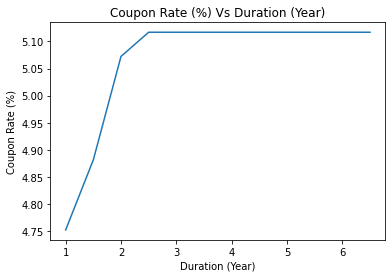

In [ ]:
Year = list(df["Term"])[0:12]
Unemployment_Rate = result

plt.plot(Year, Unemployment_Rate[0:12])
plt.title('Coupon Rate (%) Vs Duration (Year)')
plt.xlabel('Duration (Year)')
plt.ylabel('Coupon Rate (%)')
plt.show()




In [ ]:
print(Year)
print(result)
print(list(df["total_asset"]))

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5]
[4.75240012 4.8816316  5.07231727 5.11685691 5.11685691 5.11685691
 5.11685691 5.11685691 5.11685691 5.11685691 5.11685691 5.11685691
 5.21592128 5.21592128 5.21592128 5.21592128 5.24467863 5.24467863
 5.24467863 5.24467863 5.24467863 5.34456587 5.34456587]
[11303.89, 11303.89, 11303.89, 11303.89, 11303.89, 11303.89, 11303.89, 11303.89, 11303.89, 11303.89, 11303.89, 11303.89, 11303.89, 11303.89, 11303.89, 11303.89, 11303.89, 11303.89, 11303.89, 11303.89, 11303.89, 11303.89, 11303.89]
